In [1]:
import pandas as pd
import numpy as np
from nltk.stem.porter import *
import pickle

In [2]:
# pip install transphone

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/kaggle/input/city-inhaitant-data/dataset2.csv')

In [5]:
df

,city,inhabitant
0,Aalborg,Aalborgenser
1,Aarhus,Aarhusian
2,Aberdeen,Aberdonian
3,Abidjan,Abidjanais
4,Adana,Adanite
...,...,...
611,Zaragoza,Zaragozan
612,Zonguldak,Zonguldaki
613,Zintan,Zintani
614,Zurich,Zuricher


In [6]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

,city,inhabitant
0,aalborg,aalborgenser
1,aarhus,aarhusian
2,aberdeen,aberdonian
3,abidjan,abidjanais
4,adana,adanite
...,...,...
611,zaragoza,zaragozan
612,zonguldak,zonguldaki
613,zintan,zintani
614,zurich,zuricher


In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [8]:
df['city_stemmed'] = df['city'].apply(stemmer.stem)
df['inhabitant_stemmed'] = df['inhabitant'].apply(stemmer.stem)

In [9]:
df

,city,inhabitant,city_stemmed,inhabitant_stemmed
0,aalborg,aalborgenser,aalborg,aalborgens
1,aarhus,aarhusian,aarhus,aarhusian
2,aberdeen,aberdonian,aberdeen,aberdonian
3,abidjan,abidjanais,abidjan,abidjanai
4,adana,adanite,adana,adanit
...,...,...,...,...
611,zaragoza,zaragozan,zaragoza,zaragozan
612,zonguldak,zonguldaki,zonguldak,zonguldaki
613,zintan,zintani,zintan,zintani
614,zurich,zuricher,zurich,zurich


In [10]:
def remove_last_vowel(text):
    return re.sub(r'[aeiouAEIOU]$', '', text)
df['city_stemmed_ro'] = df['city_stemmed'].apply(remove_last_vowel)

In [11]:
df['suffix'] = df.apply(lambda row: row['inhabitant_stemmed'].replace(row['city_stemmed_ro'], ''), axis=1)
df['length'] = df['suffix'].apply(len)

In [12]:
df

,city,inhabitant,city_stemmed,inhabitant_stemmed,city_stemmed_ro,suffix,length
0,aalborg,aalborgenser,aalborg,aalborgens,aalborg,ens,3
1,aarhus,aarhusian,aarhus,aarhusian,aarhus,ian,3
2,aberdeen,aberdonian,aberdeen,aberdonian,aberdeen,aberdonian,10
3,abidjan,abidjanais,abidjan,abidjanai,abidjan,ai,2
4,adana,adanite,adana,adanit,adan,it,2
...,...,...,...,...,...,...,...
611,zaragoza,zaragozan,zaragoza,zaragozan,zaragoz,an,2
612,zonguldak,zonguldaki,zonguldak,zonguldaki,zonguldak,i,1
613,zintan,zintani,zintan,zintani,zintan,i,1
614,zurich,zuricher,zurich,zurich,zurich,,0


In [13]:
(df['length'] > 5).astype(int).sum()

105

In [14]:
suffixes_count = df.groupby('suffix').agg(number_of =  ('city' , 'count')).reset_index()

In [15]:
suffixes_count

,suffix,number_of
0,,64
1,a,4
2,aberdonian,1
3,ad,1
4,agathoi,1
...,...,...
191,vilnian,1
192,warsovian,1
193,waterluvian,1
194,wythenshavian,1


In [16]:
suffixes_count[suffixes_count['number_of'] > 1]

,suffix,number_of
0,,64
1,a,4
5,ai,4
11,alit,2
13,an,85
18,ano,5
47,ean,12
50,eean,2
53,eit,3
55,en,2


In [17]:
df = df[df['length'] <= 5]

In [18]:
df = df.reset_index(drop = True)
df

,city,inhabitant,city_stemmed,inhabitant_stemmed,city_stemmed_ro,suffix,length
0,aalborg,aalborgenser,aalborg,aalborgens,aalborg,ens,3
1,aarhus,aarhusian,aarhus,aarhusian,aarhus,ian,3
2,abidjan,abidjanais,abidjan,abidjanai,abidjan,ai,2
3,adana,adanite,adana,adanit,adan,it,2
4,adelaide,adelaidean,adelaid,adelaidean,adelaid,ean,3
...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoza,zaragozan,zaragoz,an,2
507,zonguldak,zonguldaki,zonguldak,zonguldaki,zonguldak,i,1
508,zintan,zintani,zintan,zintani,zintan,i,1
509,zurich,zuricher,zurich,zurich,zurich,,0


In [19]:
from transphone import read_tokenizer
eng = read_tokenizer('eng') 

downloading model  latest
from:  https://github.com/xinjli/phonepiece/releases/download/v1.0/latest.tar.gz
to:    /opt/conda/lib/python3.10/site-packages/phonepiece/data/model
please wait...
downloading model  042801_base
from:  https://github.com/xinjli/transphone/releases/download/v1.0/042801_base.tar.gz
to:    /opt/conda/lib/python3.10/site-packages/transphone/data/model
please wait...


In [20]:
df['phoneme_list'] = df['city'].apply(eng.tokenize)
df

,city,inhabitant,city_stemmed,inhabitant_stemmed,city_stemmed_ro,suffix,length,phoneme_list
0,aalborg,aalborgenser,aalborg,aalborgens,aalborg,ens,3,"[ɔ, l, b, ɔ, ɹ, ɡ]"
1,aarhus,aarhusian,aarhus,aarhusian,aarhus,ian,3,"[ɑ, h, u, s]"
2,abidjan,abidjanais,abidjan,abidjanai,abidjan,ai,2,"[æ, b, ɪ, d͡ʒ, ɑ, n]"
3,adana,adanite,adana,adanit,adan,it,2,"[ʌ, d, æ, n, ʌ]"
4,adelaide,adelaidean,adelaid,adelaidean,adelaid,ean,3,"[æ, d, ʌ, l, e, j, d]"
...,...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoza,zaragozan,zaragoz,an,2,"[z, ɑ, ɹ, ɑ, ɡ, o, w, z, ʌ]"
507,zonguldak,zonguldaki,zonguldak,zonguldaki,zonguldak,i,1,"[z, ɑ, ŋ, ɡ, ʌ, l, d, ʌ, k]"
508,zintan,zintani,zintan,zintani,zintan,i,1,"[z, ɪ, n, t, ʌ, n]"
509,zurich,zuricher,zurich,zurich,zurich,,0,"[z, ʊ, ɹ, ɪ, k]"


In [21]:
df['phoneme_ids'] = df['phoneme_list'].apply(eng.convert_tokens_to_ids)
df

,city,inhabitant,city_stemmed,inhabitant_stemmed,city_stemmed_ro,suffix,length,phoneme_list,phoneme_ids
0,aalborg,aalborgenser,aalborg,aalborgens,aalborg,ens,3,"[ɔ, l, b, ɔ, ɹ, ɡ]","[27, 11, 2, 27, 32, 30]"
1,aarhus,aarhusian,aarhus,aarhusian,aarhus,ian,3,"[ɑ, h, u, s]","[26, 7, 19, 16]"
2,abidjan,abidjanais,abidjan,abidjanai,abidjan,ai,2,"[æ, b, ɪ, d͡ʒ, ɑ, n]","[23, 2, 31, 4, 26, 13]"
3,adana,adanite,adana,adanit,adan,it,2,"[ʌ, d, æ, n, ʌ]","[36, 3, 23, 13, 36]"
4,adelaide,adelaidean,adelaid,adelaidean,adelaid,ean,3,"[æ, d, ʌ, l, e, j, d]","[23, 3, 36, 11, 5, 9, 3]"
...,...,...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoza,zaragozan,zaragoz,an,2,"[z, ɑ, ɹ, ɑ, ɡ, o, w, z, ʌ]","[22, 26, 32, 26, 30, 14, 21, 22, 36]"
507,zonguldak,zonguldaki,zonguldak,zonguldaki,zonguldak,i,1,"[z, ɑ, ŋ, ɡ, ʌ, l, d, ʌ, k]","[22, 26, 25, 30, 36, 11, 3, 36, 10]"
508,zintan,zintani,zintan,zintani,zintan,i,1,"[z, ɪ, n, t, ʌ, n]","[22, 31, 13, 17, 36, 13]"
509,zurich,zuricher,zurich,zurich,zurich,,0,"[z, ʊ, ɹ, ɪ, k]","[22, 35, 32, 31, 10]"


In [22]:
plength = 3

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded_suffix'] = label_encoder.fit_transform(df['suffix'])

In [46]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [24]:
df

,city,inhabitant,city_stemmed,inhabitant_stemmed,city_stemmed_ro,suffix,length,phoneme_list,phoneme_ids,encoded_suffix
0,aalborg,aalborgenser,aalborg,aalborgens,aalborg,ens,3,"[ɔ, l, b, ɔ, ɹ, ɡ]","[27, 11, 2, 27, 32, 30]",30
1,aarhus,aarhusian,aarhus,aarhusian,aarhus,ian,3,"[ɑ, h, u, s]","[26, 7, 19, 16]",43
2,abidjan,abidjanais,abidjan,abidjanai,abidjan,ai,2,"[æ, b, ɪ, d͡ʒ, ɑ, n]","[23, 2, 31, 4, 26, 13]",3
3,adana,adanite,adana,adanit,adan,it,2,"[ʌ, d, æ, n, ʌ]","[36, 3, 23, 13, 36]",54
4,adelaide,adelaidean,adelaid,adelaidean,adelaid,ean,3,"[æ, d, ʌ, l, e, j, d]","[23, 3, 36, 11, 5, 9, 3]",19
...,...,...,...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoza,zaragozan,zaragoz,an,2,"[z, ɑ, ɹ, ɑ, ɡ, o, w, z, ʌ]","[22, 26, 32, 26, 30, 14, 21, 22, 36]",9
507,zonguldak,zonguldaki,zonguldak,zonguldaki,zonguldak,i,1,"[z, ɑ, ŋ, ɡ, ʌ, l, d, ʌ, k]","[22, 26, 25, 30, 36, 11, 3, 36, 10]",41
508,zintan,zintani,zintan,zintani,zintan,i,1,"[z, ɪ, n, t, ʌ, n]","[22, 31, 13, 17, 36, 13]",41
509,zurich,zuricher,zurich,zurich,zurich,,0,"[z, ʊ, ɹ, ɪ, k]","[22, 35, 32, 31, 10]",0


In [25]:
training_df = df[[ 'city' , 'inhabitant' , 'city_stemmed_ro' , 'phoneme_ids' , 'suffix' , 'encoded_suffix']]
training_df

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix
0,aalborg,aalborgenser,aalborg,"[27, 11, 2, 27, 32, 30]",ens,30
1,aarhus,aarhusian,aarhus,"[26, 7, 19, 16]",ian,43
2,abidjan,abidjanais,abidjan,"[23, 2, 31, 4, 26, 13]",ai,3
3,adana,adanite,adan,"[36, 3, 23, 13, 36]",it,54
4,adelaide,adelaidean,adelaid,"[23, 3, 36, 11, 5, 9, 3]",ean,19
...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoz,"[22, 26, 32, 26, 30, 14, 21, 22, 36]",an,9
507,zonguldak,zonguldaki,zonguldak,"[22, 26, 25, 30, 36, 11, 3, 36, 10]",i,41
508,zintan,zintani,zintan,"[22, 31, 13, 17, 36, 13]",i,41
509,zurich,zuricher,zurich,"[22, 35, 32, 31, 10]",,0


In [26]:
def extract_last_three(lst):
    if len(lst) >= 3:
        return lst[-3:]
    else:
        return [None, None, None]
training_df[['last1', 'last2', 'last3']] = training_df['phoneme_ids'].apply(extract_last_three).apply(pd.Series)
training_df

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,last1,last2,last3
0,aalborg,aalborgenser,aalborg,"[27, 11, 2, 27, 32, 30]",ens,30,27,32,30
1,aarhus,aarhusian,aarhus,"[26, 7, 19, 16]",ian,43,7,19,16
2,abidjan,abidjanais,abidjan,"[23, 2, 31, 4, 26, 13]",ai,3,4,26,13
3,adana,adanite,adan,"[36, 3, 23, 13, 36]",it,54,23,13,36
4,adelaide,adelaidean,adelaid,"[23, 3, 36, 11, 5, 9, 3]",ean,19,5,9,3
...,...,...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoz,"[22, 26, 32, 26, 30, 14, 21, 22, 36]",an,9,21,22,36
507,zonguldak,zonguldaki,zonguldak,"[22, 26, 25, 30, 36, 11, 3, 36, 10]",i,41,3,36,10
508,zintan,zintani,zintan,"[22, 31, 13, 17, 36, 13]",i,41,17,36,13
509,zurich,zuricher,zurich,"[22, 35, 32, 31, 10]",,0,32,31,10


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = training_df[['last1', 'last2', 'last3']]
y = training_df[['encoded_suffix']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=500, random_state=42)

In [28]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.36893203883495146


In [29]:
y_pred

array([ 9, 74,  7, 43, 29, 61,  9, 70, 36, 70, 36,  0, 43, 43, 54,  0, 53,
       36, 43, 54,  9, 67, 41,  0,  9, 43,  7, 54,  0,  9,  0,  9,  9, 43,
       62, 43,  9, 43, 43,  9, 43,  0, 43, 43,  9, 30, 43,  0, 36, 17,  0,
        9, 54, 23, 43, 43, 36,  0, 80,  9,  9, 79, 36, 43,  9, 43, 31,  9,
       43,  0, 42, 43, 54,  9,  1, 43, 43, 33, 43,  9, 43, 81, 54, 23, 54,
        9, 54, 32, 43, 41, 43,  9, 54,  9, 70, 43,  9,  9,  9, 36, 29,  9,
        9])

In [30]:
predicted_df = training_df.loc[X_test.index.to_list()]
predicted_df['y_pred'] = y_pred

In [31]:
predicted_df

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,last1,last2,last3,y_pred
124,curitiba,curitibano,curitib,"[10, 9, 35, 31, 17, 8, 2, 36]",ano,14,8,2,36,9
84,buffalo,buffalonian,buffal,"[2, 36, 6, 36, 11, 14, 21]",onian,72,11,14,21,74
433,springfield,springfieldian,springfield,"[16, 15, 32, 31, 25, 6, 8, 11, 3]",ian,43,8,11,3,7
255,luton,lutonian,luton,"[11, 19, 17, 36, 13]",ian,43,17,36,13,43
68,bologna,bolognese,bologn,"[2, 36, 11, 14, 21, 13, 8]",es,36,21,13,8,29
...,...,...,...,...,...,...,...,...,...,...
494,wichita,wichitan,wichit,"[21, 31, 18, 36, 17, 27]",an,9,36,17,27,9
483,vienna,viennese,vienn,"[20, 8, 29, 13, 36]",es,36,29,13,36,36
275,medina,medinan,medin,"[12, 36, 3, 1, 9, 13, 36]",an,9,9,13,36,29
454,tel aviv,tel avivian,tel aviv,"[17, 29, 11, 26, 20, 8, 20]",ian,43,20,8,20,9


In [32]:
predicted_df['predicted_suffix'] = label_encoder.inverse_transform(predicted_df['y_pred'])
predicted_df

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,last1,last2,last3,y_pred,predicted_suffix
124,curitiba,curitibano,curitib,"[10, 9, 35, 31, 17, 8, 2, 36]",ano,14,8,2,36,9,an
84,buffalo,buffalonian,buffal,"[2, 36, 6, 36, 11, 14, 21]",onian,72,11,14,21,74,ovian
433,springfield,springfieldian,springfield,"[16, 15, 32, 31, 25, 6, 8, 11, 3]",ian,43,8,11,3,7,alian
255,luton,lutonian,luton,"[11, 19, 17, 36, 13]",ian,43,17,36,13,43,ian
68,bologna,bolognese,bologn,"[2, 36, 11, 14, 21, 13, 8]",es,36,21,13,8,29,eno
...,...,...,...,...,...,...,...,...,...,...,...
494,wichita,wichitan,wichit,"[21, 31, 18, 36, 17, 27]",an,9,36,17,27,9,an
483,vienna,viennese,vienn,"[20, 8, 29, 13, 36]",es,36,29,13,36,36,es
275,medina,medinan,medin,"[12, 36, 3, 1, 9, 13, 36]",an,9,9,13,36,29,eno
454,tel aviv,tel avivian,tel aviv,"[17, 29, 11, 26, 20, 8, 20]",ian,43,20,8,20,9,an


In [33]:
predicted_df['predicted_inhabitant'] = predicted_df['city_stemmed_ro'] + predicted_df['predicted_suffix']
predicted_df

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,last1,last2,last3,y_pred,predicted_suffix,predicted_inhabitant
124,curitiba,curitibano,curitib,"[10, 9, 35, 31, 17, 8, 2, 36]",ano,14,8,2,36,9,an,curitiban
84,buffalo,buffalonian,buffal,"[2, 36, 6, 36, 11, 14, 21]",onian,72,11,14,21,74,ovian,buffalovian
433,springfield,springfieldian,springfield,"[16, 15, 32, 31, 25, 6, 8, 11, 3]",ian,43,8,11,3,7,alian,springfieldalian
255,luton,lutonian,luton,"[11, 19, 17, 36, 13]",ian,43,17,36,13,43,ian,lutonian
68,bologna,bolognese,bologn,"[2, 36, 11, 14, 21, 13, 8]",es,36,21,13,8,29,eno,bologneno
...,...,...,...,...,...,...,...,...,...,...,...,...
494,wichita,wichitan,wichit,"[21, 31, 18, 36, 17, 27]",an,9,36,17,27,9,an,wichitan
483,vienna,viennese,vienn,"[20, 8, 29, 13, 36]",es,36,29,13,36,36,es,viennes
275,medina,medinan,medin,"[12, 36, 3, 1, 9, 13, 36]",an,9,9,13,36,29,eno,medineno
454,tel aviv,tel avivian,tel aviv,"[17, 29, 11, 26, 20, 8, 20]",ian,43,20,8,20,9,an,tel avivan


In [34]:
(predicted_df['inhabitant'] == predicted_df['predicted_inhabitant']).astype(int).sum()

31

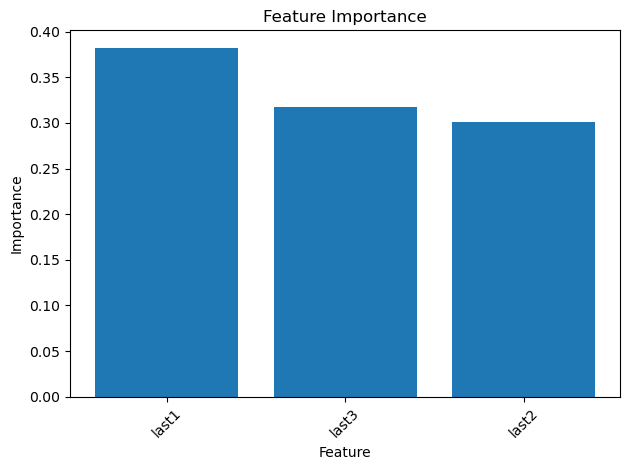

In [35]:
import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()







# SVM

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = training_df[['last1', 'last2', 'last3']]
y = training_df[['encoded_suffix']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grid = {'C': [0.1, 1, 10, 100]}

for kernel in kernels:
    
    print(f"Kernel: {kernel}")
    clf = SVC(kernel=kernel,random_state=42)
    
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_c = grid_search.best_params_['C']
    
    final_clf = SVC(kernel=kernel, C=best_c, random_state=42)
    final_clf.fit(X_train, y_train)
    
    with open(f'{kernel}_SVM_model.pkl', 'wb') as file:
        pickle.dump(final_clf, file)

    
    y_pred = final_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel:", accuracy)
    print('---------------------------------------------------------')

Kernel: linear
Accuracy with linear kernel: 0.39805825242718446
---------------------------------------------------------
Kernel: rbf
Accuracy with rbf kernel: 0.39805825242718446
---------------------------------------------------------
Kernel: poly
Accuracy with poly kernel: 0.39805825242718446
---------------------------------------------------------
Kernel: sigmoid
Accuracy with sigmoid kernel: 0.22330097087378642
---------------------------------------------------------


# Using the entire list of phenems as the input

In [37]:
training_df_all = df[[ 'city' , 'inhabitant' , 'city_stemmed_ro' , 'phoneme_ids' , 'suffix' , 'encoded_suffix']]
training_df_all

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix
0,aalborg,aalborgenser,aalborg,"[27, 11, 2, 27, 32, 30]",ens,30
1,aarhus,aarhusian,aarhus,"[26, 7, 19, 16]",ian,43
2,abidjan,abidjanais,abidjan,"[23, 2, 31, 4, 26, 13]",ai,3
3,adana,adanite,adan,"[36, 3, 23, 13, 36]",it,54
4,adelaide,adelaidean,adelaid,"[23, 3, 36, 11, 5, 9, 3]",ean,19
...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoz,"[22, 26, 32, 26, 30, 14, 21, 22, 36]",an,9
507,zonguldak,zonguldaki,zonguldak,"[22, 26, 25, 30, 36, 11, 3, 36, 10]",i,41
508,zintan,zintani,zintan,"[22, 31, 13, 17, 36, 13]",i,41
509,zurich,zuricher,zurich,"[22, 35, 32, 31, 10]",,0


In [38]:
max_length = training_df_all['phoneme_ids'].apply(len).max()
max_length

14

In [39]:
training_df_all['phoneme_ids_padded'] = training_df_all['phoneme_ids'].apply(lambda x: x + [-1]* (max_length - len(x)) )
training_df_all

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,phoneme_ids_padded
0,aalborg,aalborgenser,aalborg,"[27, 11, 2, 27, 32, 30]",ens,30,"[27, 11, 2, 27, 32, 30, -1, -1, -1, -1, -1, -1..."
1,aarhus,aarhusian,aarhus,"[26, 7, 19, 16]",ian,43,"[26, 7, 19, 16, -1, -1, -1, -1, -1, -1, -1, -1..."
2,abidjan,abidjanais,abidjan,"[23, 2, 31, 4, 26, 13]",ai,3,"[23, 2, 31, 4, 26, 13, -1, -1, -1, -1, -1, -1,..."
3,adana,adanite,adan,"[36, 3, 23, 13, 36]",it,54,"[36, 3, 23, 13, 36, -1, -1, -1, -1, -1, -1, -1..."
4,adelaide,adelaidean,adelaid,"[23, 3, 36, 11, 5, 9, 3]",ean,19,"[23, 3, 36, 11, 5, 9, 3, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoz,"[22, 26, 32, 26, 30, 14, 21, 22, 36]",an,9,"[22, 26, 32, 26, 30, 14, 21, 22, 36, -1, -1, -..."
507,zonguldak,zonguldaki,zonguldak,"[22, 26, 25, 30, 36, 11, 3, 36, 10]",i,41,"[22, 26, 25, 30, 36, 11, 3, 36, 10, -1, -1, -1..."
508,zintan,zintani,zintan,"[22, 31, 13, 17, 36, 13]",i,41,"[22, 31, 13, 17, 36, 13, -1, -1, -1, -1, -1, -..."
509,zurich,zuricher,zurich,"[22, 35, 32, 31, 10]",,0,"[22, 35, 32, 31, 10, -1, -1, -1, -1, -1, -1, -..."


In [40]:
for i in range(max_length):
    training_df_all[f'phoneme_{i+1}'] = training_df_all['phoneme_ids_padded'].apply(lambda x: x[i] if len(x) > i else None)
training_df_all

,city,inhabitant,city_stemmed_ro,phoneme_ids,suffix,encoded_suffix,phoneme_ids_padded,phoneme_1,phoneme_2,phoneme_3,...,phoneme_5,phoneme_6,phoneme_7,phoneme_8,phoneme_9,phoneme_10,phoneme_11,phoneme_12,phoneme_13,phoneme_14
0,aalborg,aalborgenser,aalborg,"[27, 11, 2, 27, 32, 30]",ens,30,"[27, 11, 2, 27, 32, 30, -1, -1, -1, -1, -1, -1...",27,11,2,...,32,30,-1,-1,-1,-1,-1,-1,-1,-1
1,aarhus,aarhusian,aarhus,"[26, 7, 19, 16]",ian,43,"[26, 7, 19, 16, -1, -1, -1, -1, -1, -1, -1, -1...",26,7,19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,abidjan,abidjanais,abidjan,"[23, 2, 31, 4, 26, 13]",ai,3,"[23, 2, 31, 4, 26, 13, -1, -1, -1, -1, -1, -1,...",23,2,31,...,26,13,-1,-1,-1,-1,-1,-1,-1,-1
3,adana,adanite,adan,"[36, 3, 23, 13, 36]",it,54,"[36, 3, 23, 13, 36, -1, -1, -1, -1, -1, -1, -1...",36,3,23,...,36,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,adelaide,adelaidean,adelaid,"[23, 3, 36, 11, 5, 9, 3]",ean,19,"[23, 3, 36, 11, 5, 9, 3, -1, -1, -1, -1, -1, -...",23,3,36,...,5,9,3,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,zaragoza,zaragozan,zaragoz,"[22, 26, 32, 26, 30, 14, 21, 22, 36]",an,9,"[22, 26, 32, 26, 30, 14, 21, 22, 36, -1, -1, -...",22,26,32,...,30,14,21,22,36,-1,-1,-1,-1,-1
507,zonguldak,zonguldaki,zonguldak,"[22, 26, 25, 30, 36, 11, 3, 36, 10]",i,41,"[22, 26, 25, 30, 36, 11, 3, 36, 10, -1, -1, -1...",22,26,25,...,36,11,3,36,10,-1,-1,-1,-1,-1
508,zintan,zintani,zintan,"[22, 31, 13, 17, 36, 13]",i,41,"[22, 31, 13, 17, 36, 13, -1, -1, -1, -1, -1, -...",22,31,13,...,36,13,-1,-1,-1,-1,-1,-1,-1,-1
509,zurich,zuricher,zurich,"[22, 35, 32, 31, 10]",,0,"[22, 35, 32, 31, 10, -1, -1, -1, -1, -1, -1, -...",22,35,32,...,10,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [41]:
X = training_df_all.iloc[: , 7: ]
y = training_df_all.iloc[:,5]

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_all = RandomForestClassifier(n_estimators=500, random_state=42)
clf_all.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

In [43]:
y_pred = clf_all.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2621359223300971


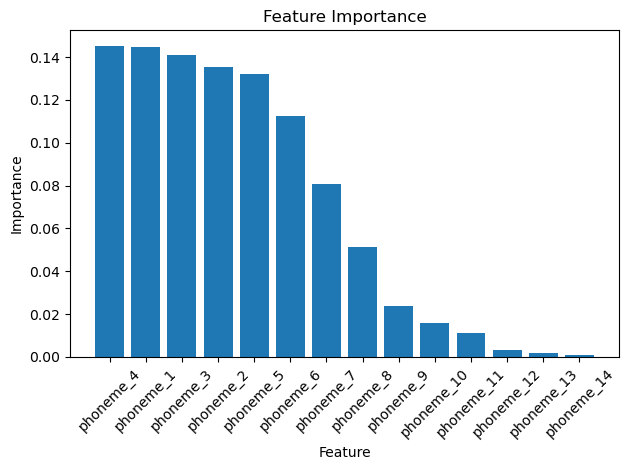

In [44]:
import matplotlib.pyplot as plt
feature_importances = clf_all.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# SVM

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X = training_df_all.iloc[: , 7: ]
y = training_df_all.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grid = {'C': [0.1, 1, 10, 100]}

for kernel in kernels:
    
    print(f"Kernel: {kernel}")
    clf = SVC(kernel=kernel,random_state=42)
    
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_c = grid_search.best_params_['C']
    
    final_clf = SVC(kernel=kernel, C=best_c, random_state=42)
    final_clf.fit(X_train, y_train)
    
    y_pred = final_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel:", accuracy)
    print('---------------------------------------------------------')

Kernel: linear
Accuracy with linear kernel: 0.21359223300970873
---------------------------------------------------------
Kernel: rbf
Accuracy with rbf kernel: 0.20388349514563106
---------------------------------------------------------
Kernel: poly
Accuracy with poly kernel: 0.24271844660194175
---------------------------------------------------------
Kernel: sigmoid
Accuracy with sigmoid kernel: 0.2621359223300971
---------------------------------------------------------
